In [1]:
%load_ext autoreload
%autoreload 2

In [243]:
from src.utils import setup_data_dir
from pathlib import Path

setup_data_dir()
data_dir = Path("data")

embedding_dir = data_dir / "GenePT_emebdding_v2"
ada_embedding_path = embedding_dir / "GenePT_gene_embedding_ada_text.pickle"
large_embedding_path = (
    embedding_dir / "GenePT_gene_protein_embedding_model_3_text.pickle."
)

print("embedding_dir exists:", embedding_dir.exists())
print("ada_embedding_path exists:", ada_embedding_path.exists())
print("large_embedding_path exists:", large_embedding_path.exists())

File already exists at /Users/rj/personal/GenePT-fork/data/GenePT_emebdding_v2.zip
Extracting files...
Extracting GenePT_emebdding_v2/
Skipping GenePT_emebdding_v2/NCBI_UniProt_summary_of_genes.json - already exists with same size
Skipping GenePT_emebdding_v2/GenePT_gene_embedding_ada_text.pickle - already exists with same size
Skipping GenePT_emebdding_v2/GenePT_gene_protein_embedding_model_3_text.pickle. - already exists with same size
Skipping GenePT_emebdding_v2/NCBI_summary_of_genes.json - already exists with same size
Extraction complete!
Setup finished!
embedding_dir exists: True
ada_embedding_path exists: True
large_embedding_path exists: True


In [244]:
from src.utils import get_gene_embeddings

# gene_embedding = get_gene_embeddings("text-embedding-ada-002")
gene_embedding = get_gene_embeddings("text-embedding-3-large")

In [245]:
from src.utils import download_file, extract_gz
import pandas as pd

gene_sums_gz = download_file(
    "https://duffel.rail.bio/recount3/human/data_sources/sra/gene_sums/72/SRP150872/sra.gene_sums.SRP150872.G026.gz"
)
gene_sums_path = extract_gz(gene_sums_gz)
gene_sums_df = pd.read_csv(str(gene_sums_path), sep="\t", comment="#")
gene_sums_df["gene_id_short"] = gene_sums_df.gene_id.str.split(".").str[0]
gene_sums_df.head()

File already exists at /Users/rj/personal/GenePT-fork/data/sra.gene_sums.SRP150872.G026.gz
Skipping sra.gene_sums.SRP150872.G026.gz - already exists with same size


,gene_id,SRR7368000,SRR7367700,SRR7367800,SRR7367900,SRR7367701,SRR7367801,SRR7368001,SRR7367901,SRR7367602,...,SRR7367997,SRR7367898,SRR7367698,SRR7367798,SRR7367998,SRR7367799,SRR7367899,SRR7367699,SRR7367999,gene_id_short
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000278704
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277400
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000274847
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000277428
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000276256


In [248]:
gene_info_table = pd.read_csv("input_data/gene_info_table.csv")
gene_info_table.head()

,Unnamed: 0,ensembl_id,gene_name,gene_type
0,0,ENSG00000000003,TSPAN6,protein_coding
1,1,ENSG00000000005,TNMD,protein_coding
2,2,ENSG00000000419,DPM1,protein_coding
3,3,ENSG00000000457,SCYL3,protein_coding
4,4,ENSG00000000460,C1orf112,protein_coding


In [95]:
gene_sums_with_names = gene_sums_df.merge(
    gene_info_table, left_on="gene_id_short", right_on="ensembl_id", how="left"
)
gene_sums_with_names.head()

,gene_id,SRR7368000,SRR7367700,SRR7367800,SRR7367900,SRR7367701,SRR7367801,SRR7368001,SRR7367901,SRR7367602,...,SRR7367998,SRR7367799,SRR7367899,SRR7367699,SRR7367999,gene_id_short,Unnamed: 0,ensembl_id,gene_name,gene_type
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000278704,66320.0,ENSG00000278704,BX004987.1,protein_coding
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277400,65583.0,ENSG00000277400,AC145212.2,protein_coding
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000274847,64246.0,ENSG00000274847,MAFIP,protein_coding
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277428,65598.0,ENSG00000277428,Y_RNA,misc_RNA
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000276256,64996.0,ENSG00000276256,LOC389831,protein_coding


In [103]:
gene_sums_with_names.gene_id[gene_sums_with_names.gene_name.isna()]

8        ENSG00000273735.4
9        ENSG00000273517.1
10       ENSG00000277650.1
11       ENSG00000274676.1
12       ENSG00000276534.5
               ...        
41640    ENSG00000279184.1
43934    ENSG00000283374.1
59184    ENSG00000281205.1
59393    ENSG00000274916.1
59395    ENSG00000273676.1
Name: gene_id, Length: 3365, dtype: object

In [249]:
print("Total genes in gene_sums_with_names:", len(gene_sums_with_names))
print(
    "Total distinct genes in gene_sums_with_names:",
    len(gene_sums_with_names.gene_name.unique()),
)
print(
    "Total genes with embeddings:",
    gene_sums_with_names.gene_name.apply(lambda x: x in gene_embedding).sum(),
)
print(
    "Total genes with embeddings:",
    gene_sums_with_names.gene_name.apply(lambda x: x in gene_embedding).sum(),
)

print("total embeddings:", len(gene_embedding.keys()))

Total genes in gene_sums_with_names: 63856
Total distinct genes in gene_sums_with_names: 56409
Total genes with embeddings: 32359
Total genes with embeddings: 32359
total embeddings: 133736


In [250]:
metadata_gz = download_file(
    "https://duffel.rail.bio/recount3/human/data_sources/sra/metadata/72/SRP150872/sra.sra.SRP150872.MD.gz"
)
metadata_path = extract_gz(metadata_gz)
metadata_df = pd.read_csv(str(metadata_path), sep="\t", comment="#")
metadata_df.columns

File already exists at /Users/rj/personal/GenePT-fork/data/sra.sra.SRP150872.MD.gz
Skipping sra.sra.SRP150872.MD.gz - already exists with same size


Index(['rail_id', 'external_id', 'study', 'sample_acc', 'experiment_acc',
       'submission_acc', 'submission_center', 'submission_lab', 'study_title',
       'study_abstract', 'study_description', 'experiment_title',
       'design_description', 'sample_description', 'library_name',
       'library_strategy', 'library_source', 'library_selection',
       'library_layout', 'paired_nominal_length', 'paired_nominal_stdev',
       'library_construction_protocol', 'platform_model', 'sample_attributes',
       'experiment_attributes', 'spot_length', 'sample_name', 'sample_title',
       'sample_bases', 'sample_spots', 'run_published', 'size',
       'run_total_bases', 'run_total_spots', 'num_reads', 'num_spots',
       'read_info', 'run_alias', 'run_center_name', 'run_broker_name',
       'run_center'],
      dtype='object')

In [251]:
metadata_df.sample_attributes[0]

'drug dose;;10mg|drug exposure;;0|ifn status;;NA|recruitment site;;1008|source_name;;Whole blood|subject age;;49|subject sex;;Female|timepoint;;0|tissue;;Whole blood'

In [252]:
from src.recount3_utils import parse_attributes

sample_attributes_df = parse_attributes(metadata_df, "external_id", "sample_attributes")
sample_attributes_df["subject_id"] = metadata_df.experiment_title.str.extract(
    r"subject(SLE\d+)"
)[0]

In [253]:
sample_attributes_df

,external_id,drug dose,drug exposure,ifn status,recruitment site,source_name,subject age,subject sex,timepoint,tissue,subject_id
0,SRR7367602,10mg,0,NA,1008,Whole blood,49,Female,0,Whole blood,SLE1
1,SRR7367603,200mg,0,High,1017,Whole blood,41,Female,0,Whole blood,SLE2
2,SRR7367604,Placebo,0,NA,1005,Whole blood,45,Female,0,Whole blood,SLE3
3,SRR7367605,50mg,0,High,1056,Whole blood,49,Female,0,Whole blood,SLE4
4,SRR7367606,200mg,0,NA,1002,Whole blood,50,Male,0,Whole blood,SLE5
...,...,...,...,...,...,...,...,...,...,...,...
463,SRR7368065,50mg,1,Low,1033,Whole blood,47,Female,12,Whole blood,SLE152
464,SRR7368066,200mg,1,NA,1179,Whole blood,38,Female,Early_withdrawal,Whole blood,SLE71
465,SRR7368067,200mg,1,Low,1027,Whole blood,40,Female,24,Whole blood,SLE13
466,SRR7368068,10mg,1,NA,1028,Whole blood,56,Female,24,Whole blood,SLE66


In [254]:
sample_attributes_df[sample_attributes_df.subject_id.isin(["SLE1", "SLE2", "SLE3"])]
sample_attributes_df["drug exposure"] = sample_attributes_df["drug exposure"].astype(
    int
)
sample_attributes_df["subject age"] = sample_attributes_df["subject age"].astype(float)

In [255]:
gene_sums_with_names.head()

,gene_id,SRR7368000,SRR7367700,SRR7367800,SRR7367900,SRR7367701,SRR7367801,SRR7368001,SRR7367901,SRR7367602,...,SRR7367998,SRR7367799,SRR7367899,SRR7367699,SRR7367999,gene_id_short,Unnamed: 0,ensembl_id,gene_name,gene_type
0,ENSG00000278704.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000278704,66320.0,ENSG00000278704,BX004987.1,protein_coding
1,ENSG00000277400.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277400,65583.0,ENSG00000277400,AC145212.2,protein_coding
2,ENSG00000274847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000274847,64246.0,ENSG00000274847,MAFIP,protein_coding
3,ENSG00000277428.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000277428,65598.0,ENSG00000277428,Y_RNA,misc_RNA
4,ENSG00000276256.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,ENSG00000276256,64996.0,ENSG00000276256,LOC389831,protein_coding


In [256]:
experiment_ids = gene_sums_with_names.columns[
    gene_sums_with_names.columns.str.contains("SRR")
]
experiment_ids

Index(['SRR7368000', 'SRR7367700', 'SRR7367800', 'SRR7367900', 'SRR7367701',
       'SRR7367801', 'SRR7368001', 'SRR7367901', 'SRR7367602', 'SRR7367702',
       ...
       'SRR7367697', 'SRR7367997', 'SRR7367898', 'SRR7367698', 'SRR7367798',
       'SRR7367998', 'SRR7367799', 'SRR7367899', 'SRR7367699', 'SRR7367999'],
      dtype='object', length=468)

In [257]:
import numpy as np

gene_names = list(gene_sums_with_names.gene_name)
count_missing = 0
EMBED_DIM = len(next(iter(gene_embedding.values())))  # embedding dim from GPT-3.5
lookup_embed = np.zeros(shape=(len(gene_names), EMBED_DIM))
for i, gene in enumerate(gene_names):
    if gene in gene_embedding:
        lookup_embed[i, :] = gene_embedding[gene]
    else:
        count_missing += 1

genePT_w_emebed = np.dot(gene_sums_with_names[experiment_ids].T, lookup_embed) / len(
    gene_names
)
print(
    f"Unable to match {count_missing} out of {len(gene_names)} genes in the GenePT-w embedding"
)

Unable to match 31497 out of 63856 genes in the GenePT-w embedding


In [375]:
normalized_embeddings_df = pd.DataFrame(genePT_w_emebed, index=experiment_ids).div(
    pd.DataFrame(genePT_w_emebed, index=experiment_ids).sum(axis=1), axis=0
)
normalized_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
SRR7368000,-0.009398,0.019044,-0.011737,0.006919,-0.000216,-0.003659,0.013110,-0.018308,0.011136,0.004966,...,0.000654,0.010371,0.015071,-0.010296,0.000741,-0.001361,0.014744,-0.004382,-0.007240,-0.001895
SRR7367700,-0.009114,0.019483,-0.011368,0.006303,0.000689,-0.003803,0.012331,-0.018939,0.011388,0.004618,...,-0.000169,0.009880,0.014981,-0.009314,0.000822,-0.001308,0.014476,-0.004452,-0.007415,-0.001918
SRR7367800,-0.009158,0.018953,-0.011889,0.007254,-0.000752,-0.004070,0.013871,-0.018346,0.011807,0.005254,...,0.001019,0.010839,0.015333,-0.010312,0.000894,-0.001376,0.014917,-0.004396,-0.007173,-0.001478
SRR7367900,-0.009923,0.020753,-0.011635,0.006891,0.000475,-0.003916,0.012763,-0.020225,0.011734,0.004769,...,-0.000422,0.010399,0.015047,-0.009792,0.000928,-0.001546,0.014851,-0.004853,-0.007474,-0.002455
SRR7367701,-0.009413,0.019580,-0.011056,0.006828,0.001361,-0.004461,0.012019,-0.019647,0.011658,0.004685,...,-0.000781,0.009701,0.014441,-0.009088,0.001002,-0.001674,0.014442,-0.004717,-0.007353,-0.001976


In [368]:
# subject_ids_12_weeks = sample_attributes_df[sample_attributes_df.timepoint == "12"].subject_id
subject_ids_24_weeks = sample_attributes_df[
    sample_attributes_df.timepoint == "24"
].subject_id
id_attribute_mapping_24_weeks = (
    sample_attributes_df[sample_attributes_df.subject_id.isin(subject_ids_24_weeks)][
        sample_attributes_df.timepoint == "0"
    ][
        [
            "external_id",
            "subject_id",
            "drug dose",
            "subject sex",
            "subject age",
            "ifn status",
        ]
    ]
    .rename(columns={"ifn status": "ifn status 0"})
    .merge(
        sample_attributes_df[
            sample_attributes_df.subject_id.isin(subject_ids_24_weeks)
        ][sample_attributes_df.timepoint == "24"][["ifn status", "subject_id"]]
    )
)

id_attribute_mapping_24_weeks

/var/folders/1w/njpw08_93h73169nbj9b9z700000gp/T/ipykernel_63508/83855554.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_attributes_df[sample_attributes_df.subject_id.isin(subject_ids_24_weeks)][sample_attributes_df.timepoint == "0"][["external_id", "subject_id", "drug dose", "subject sex", "subject age", "ifn status"]]
/var/folders/1w/njpw08_93h73169nbj9b9z700000gp/T/ipykernel_63508/83855554.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_attributes_df[sample_attributes_df.subject_id.isin(subject_ids_24_weeks)][sample_attributes_df.timepoint == "24"][["ifn status", "subject_id"]]


,external_id,subject_id,drug dose,subject sex,subject age,ifn status 0,ifn status
0,SRR7367603,SLE2,200mg,Female,41.0,High,High
1,SRR7367604,SLE3,Placebo,Female,45.0,NA,NA
2,SRR7367605,SLE4,50mg,Female,49.0,High,High
3,SRR7367607,SLE6,50mg,Female,34.0,NA,NA
4,SRR7367609,SLE8,Placebo,Female,41.0,Low,Low
...,...,...,...,...,...,...,...
113,SRR7368015,SLE174,10mg,Female,57.0,High,High
114,SRR7368019,SLE164,10mg,Female,26.0,High,High
115,SRR7368023,SLE173,10mg,Male,57.0,Low,Low
116,SRR7368030,SLE171,50mg,Female,34.0,High,High


In [372]:
features_24_weeks_df["drug dose"].unique()

array(['Placebo', '200mg', '50mg', '10mg'], dtype=object)

In [373]:
features_24_weeks_df = normalized_embeddings_df.merge(
    id_attribute_mapping_24_weeks, left_index=True, right_on="external_id", how="inner"
)
subject_sex = features_24_weeks_df["subject sex"].map({"Male": 0, "Female": 1})
drug_dose = features_24_weeks_df["drug dose"].map(
    {"Placebo": 0, "50mg": 50, "200mg": 200, "10mg": 10}
)

features_24_weeks_numeric_df = features_24_weeks_df.copy()
features_24_weeks_numeric_df["subject sex"] = subject_sex
features_24_weeks_numeric_df["drug dose"] = drug_dose
features_24_weeks_numeric_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3069,3070,3071,external_id,subject_id,drug dose,subject sex,subject age,ifn status 0,ifn status
66,-0.009114,0.019483,-0.011368,0.006303,0.000689,-0.003803,0.012331,-0.018939,0.011388,0.004618,...,-0.004452,-0.007415,-0.001918,SRR7367700,SLE97,0,1,45.0,Low,Low
67,-0.009413,0.019580,-0.011056,0.006828,0.001361,-0.004461,0.012019,-0.019647,0.011658,0.004685,...,-0.004717,-0.007353,-0.001976,SRR7367701,SLE98,200,1,60.0,High,High
102,-0.009123,0.019466,-0.011436,0.006494,0.000786,-0.003552,0.012510,-0.019029,0.011353,0.004816,...,-0.004498,-0.007414,-0.002085,SRR7367901,SLE132,50,1,42.0,Low,Low
0,-0.010486,0.019700,-0.011059,0.006652,0.001027,-0.004455,0.011627,-0.019575,0.011311,0.004642,...,-0.004929,-0.007279,-0.002356,SRR7367603,SLE2,200,1,41.0,High,High
103,-0.009036,0.019423,-0.011750,0.006846,-0.000593,-0.003977,0.013474,-0.018369,0.011313,0.004962,...,-0.004322,-0.007335,-0.001577,SRR7367903,SLE124,0,1,43.0,Low,Low


In [374]:
features_24_weeks_numeric_df[
    features_24_weeks_numeric_df["ifn status"]
    != features_24_weeks_numeric_df["ifn status 0"]
]

,0,1,2,3,4,5,6,7,8,9,...,3069,3070,3071,external_id,subject_id,drug dose,subject sex,subject age,ifn status 0,ifn status
70,-0.010884,0.019678,-0.010928,0.006896,0.002444,-0.004953,0.010638,-0.019904,0.012359,0.004802,...,-0.004972,-0.007202,-0.002436,SRR7367706,SLE103,10,1,30.0,NA,High
72,-0.010837,0.019407,-0.010942,0.006761,0.002398,-0.004417,0.010831,-0.019672,0.011899,0.004570,...,-0.004994,-0.007359,-0.002348,SRR7367710,SLE106,0,1,24.0,NA,High
7,-0.009394,0.019064,-0.011481,0.007299,-0.000168,-0.004696,0.013137,-0.019018,0.011896,0.005013,...,-0.004556,-0.007096,-0.001501,SRR7367612,SLE11,10,1,33.0,High,Low
11,-0.008767,0.019823,-0.011738,0.006547,0.000318,-0.003726,0.012711,-0.019259,0.011499,0.004669,...,-0.004531,-0.007502,-0.001836,SRR7367617,SLE16,0,0,48.0,Low,NA
18,-0.009158,0.019435,-0.011672,0.006768,-0.000101,-0.004048,0.013160,-0.018800,0.011558,0.005026,...,-0.004462,-0.007322,-0.001762,SRR7367629,SLE26,50,1,44.0,Low,High
20,-0.009781,0.019428,-0.011234,0.006689,0.000885,-0.004100,0.012199,-0.019277,0.011628,0.004913,...,-0.004661,-0.007456,-0.002209,SRR7367632,SLE29,50,0,30.0,High,Low
24,-0.009687,0.019344,-0.011381,0.006558,0.000944,-0.003773,0.012339,-0.019224,0.011652,0.004875,...,-0.004592,-0.007470,-0.002319,SRR7367639,SLE36,0,1,37.0,High,NA
46,-0.009515,0.019451,-0.011504,0.007063,-0.000292,-0.004220,0.012933,-0.019093,0.011263,0.005065,...,-0.004718,-0.007443,-0.001929,SRR7367669,SLE66,10,1,56.0,High,NA
48,-0.009028,0.019237,-0.011525,0.006568,0.000273,-0.003544,0.012855,-0.018607,0.011165,0.004892,...,-0.004424,-0.007319,-0.001840,SRR7367671,SLE68,10,1,35.0,Low,High
49,-0.008933,0.019170,-0.011578,0.006811,-0.000207,-0.004058,0.013089,-0.018558,0.011433,0.004910,...,-0.004491,-0.007304,-0.001617,SRR7367672,SLE69,10,1,45.0,Low,High


In [371]:
features_24_weeks_numeric_df[features_24_weeks_numeric_df["drug dose"] == 200]

,0,1,2,3,4,5,6,7,8,9,...,3069,3070,3071,external_id,subject_id,drug dose,subject sex,subject age,ifn status 0,ifn status
67,-0.009413,0.019580,-0.011056,0.006828,0.001361,-0.004461,0.012019,-0.019647,0.011658,0.004685,...,-0.004717,-0.007353,-0.001976,SRR7367701,SLE98,200.0,1,60.0,High,High
0,-0.010486,0.019700,-0.011059,0.006652,0.001027,-0.004455,0.011627,-0.019575,0.011311,0.004642,...,-0.004929,-0.007279,-0.002356,SRR7367603,SLE2,200.0,1,41.0,High,High
74,-0.009714,0.019585,-0.011275,0.006703,0.000770,-0.003867,0.012044,-0.019148,0.011216,0.004924,...,-0.004878,-0.007497,-0.002411,SRR7367712,SLE108,200.0,1,41.0,High,High
9,-0.009234,0.019455,-0.011678,0.007030,0.000180,-0.004280,0.013239,-0.019219,0.012015,0.004730,...,-0.004438,-0.007271,-0.001627,SRR7367614,SLE13,200.0,1,40.0,Low,Low
77,-0.009670,0.019215,-0.011784,0.007541,-0.000057,-0.004666,0.013457,-0.019154,0.012095,0.005135,...,-0.004601,-0.007193,-0.001730,SRR7367715,SLE111,200.0,1,31.0,High,High
14,-0.009603,0.019379,-0.011913,0.007501,-0.001389,-0.004607,0.014175,-0.018638,0.011924,0.005233,...,-0.004365,-0.007059,-0.000920,SRR7367622,SLE20,200.0,1,41.0,Low,Low
79,-0.009043,0.019429,-0.011595,0.006685,0.000202,-0.003755,0.012928,-0.018946,0.011410,0.004902,...,-0.004495,-0.007444,-0.001972,SRR7367730,SLE121,200.0,1,39.0,High,High
26,-0.008954,0.019633,-0.011686,0.006525,-0.000004,-0.003514,0.013020,-0.018848,0.011258,0.004847,...,-0.004485,-0.007394,-0.001957,SRR7367641,SLE38,200.0,1,59.0,Low,Low
82,-0.009206,0.019705,-0.011084,0.006158,0.001959,-0.004245,0.011727,-0.019586,0.011915,0.004536,...,-0.004558,-0.007360,-0.002121,SRR7367742,SLE128,200.0,1,30.0,Low,Low
117,-0.009671,0.018659,-0.011375,0.007190,0.000237,-0.004383,0.012557,-0.018651,0.011316,0.004929,...,-0.004729,-0.007126,-0.001902,SRR7368042,SLE170,200.0,1,36.0,High,High


/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/rj/personal/GenePT-fork/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


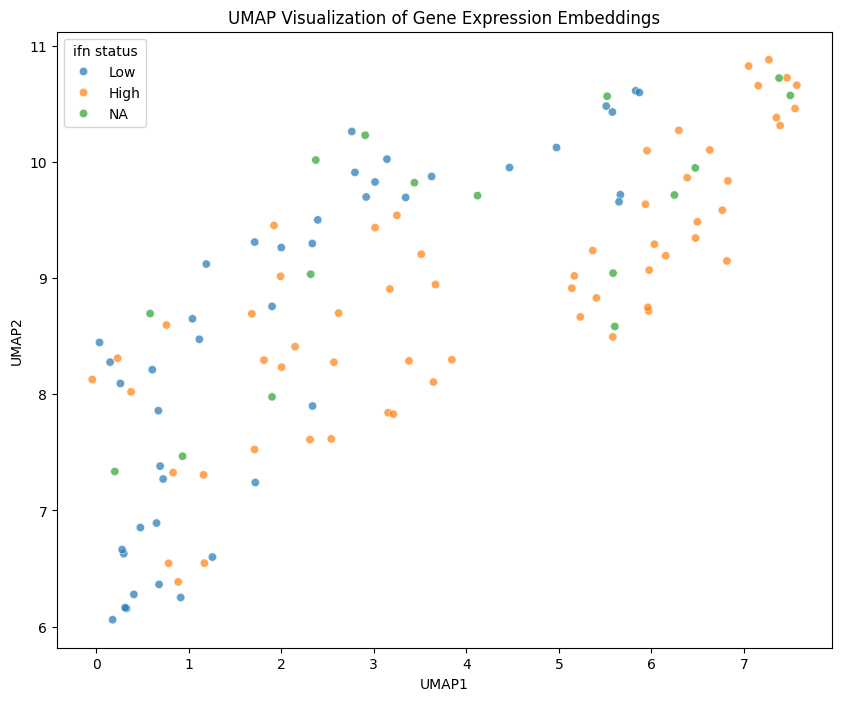

In [338]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Convert all column names to strings before applying PCA
# features_24_weeks_df.columns = features_24_weeks_df.columns.astype(str)

# Now run PCA
# pca = PCA(n_components=50)
# pca_embeddings = pca.fit_transform(features_24_weeks_df.drop(columns=['drug dose', 'external_id', 'ifn status', "subject sex", "subject age", "subject_id"]))
# Then apply UMAP to the PCA results
reducer = umap.UMAP(random_state=42)
umap_embeddings = reducer.fit_transform(
    features_24_weeks_numeric_df.drop(
        columns=[
            "external_id",
            "ifn status",
            "subject_id",
            "subject age",
            "subject sex",
            "drug dose",
        ]
    )
)

# Create a DataFrame with the UMAP coordinates using the original DataFrame's index
umap_df = pd.DataFrame(
    umap_embeddings,
    columns=["UMAP1", "UMAP2"],
    index=features_24_weeks_numeric_df.index,
)  # Use the original DataFrame's index

# Merge with sample attributes to get metadata for coloring
umap_df = umap_df.merge(
    features_24_weeks_numeric_df[["external_id", "ifn status"]],
    left_index=True,
    right_index=True,
)
# Create the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="ifn status", alpha=0.7)
plt.title("UMAP Visualization of Gene Expression Embeddings")
plt.show()

In [348]:
X = features_24_weeks_numeric_df.copy().drop(columns=["subject_id", "external_id"])
# Filter out NA values and keep only High/Low
mask = X["ifn status"].isin(["High", "Low"])
X_filtered = X[mask]
y = X_filtered["ifn status"]
X_filtered = X_filtered.drop(columns=["ifn status"])
embedding_features_indicator = pd.Series(
    [isinstance(x, int) for x in X_filtered.columns]
)

print("Shape of embedding features indicator:", embedding_features_indicator.shape)
print("Shape of filtered features matrix:", X_filtered.shape)

Shape of embedding features indicator: (3075,)
Shape of filtered features matrix: (102, 3075)


In [349]:
X_filtered.shape

(102, 3075)

In [350]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np

# Initialize storage for class-specific metrics
class_metrics = {
    "High": {"precision": [], "recall": [], "f1": [], "support": []},
    "Low": {"precision": [], "recall": [], "f1": [], "support": []},
}
overall_accuracy = []
feature_importances = []

# Run multiple times
seeds = range(42, 62)  # 10 different seeds
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y, test_size=0.1, random_state=seed, stratify=y
    )

    lgb = LGBMClassifier(random_state=seed)
    lgb.fit(X_train, y_train)
    y_pred = lgb.predict(X_test)

    # Get metrics for each class
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=["High", "Low"]
    )

    # Store class-specific metrics
    for i, label in enumerate(["High", "Low"]):
        class_metrics[label]["precision"].append(precision[i])
        class_metrics[label]["recall"].append(recall[i])
        class_metrics[label]["f1"].append(f1[i])
        class_metrics[label]["support"].append(support[i])

    overall_accuracy.append(accuracy_score(y_test, y_pred))
    feature_importances.append(lgb.feature_importances_)

# Calculate averages and standard deviations
print("Classification Report (averaged over {} runs):".format(len(seeds)))
print("              precision    recall  f1-score   support\n")

for label in ["High", "Low"]:
    avg_precision = np.mean(class_metrics[label]["precision"])
    avg_recall = np.mean(class_metrics[label]["recall"])
    avg_f1 = np.mean(class_metrics[label]["f1"])
    avg_support = int(np.mean(class_metrics[label]["support"]))

    print(
        f"{label:>10} {avg_precision:>9.2f} {avg_recall:>9.2f} {avg_f1:>9.2f} {avg_support:>9d}"
    )

print(
    "\n    accuracy",
    " " * 22,
    f"{np.mean(overall_accuracy):.2f}",
    f"{int(np.mean(sum(support)))}",
)

# Calculate macro and weighted averages
macro_precision = np.mean(
    [np.mean(class_metrics[label]["precision"]) for label in ["High", "Low"]]
)
macro_recall = np.mean(
    [np.mean(class_metrics[label]["recall"]) for label in ["High", "Low"]]
)
macro_f1 = np.mean([np.mean(class_metrics[label]["f1"]) for label in ["High", "Low"]])

print(
    f"   macro avg{macro_precision:>9.2f}{macro_recall:>9.2f}{macro_f1:>9.2f}{int(np.mean(sum(support))):>9d}"
)

# Calculate weighted averages
total_support = sum(
    np.mean(class_metrics[label]["support"]) for label in ["High", "Low"]
)
weighted_precision = (
    sum(
        np.mean(class_metrics[label]["precision"])
        * np.mean(class_metrics[label]["support"])
        for label in ["High", "Low"]
    )
    / total_support
)
weighted_recall = (
    sum(
        np.mean(class_metrics[label]["recall"])
        * np.mean(class_metrics[label]["support"])
        for label in ["High", "Low"]
    )
    / total_support
)
weighted_f1 = (
    sum(
        np.mean(class_metrics[label]["f1"]) * np.mean(class_metrics[label]["support"])
        for label in ["High", "Low"]
    )
    / total_support
)
avg_feature_importance = np.mean(feature_importances, axis=0)

print(
    f"weighted avg{weighted_precision:>9.2f}{weighted_recall:>9.2f}{weighted_f1:>9.2f}{int(total_support):>9d}"
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38, number of negative: 53
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98332
[LightGBM] [Info] Number of data points in the train set: 91, number of used features: 3074
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417582 -> initscore=-0.332706
[LightGBM] [Info] Start training from score -0.332706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [354]:
correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(
        gene_embedding[embedding]
    )
    for embedding in gene_embedding
}

abs_correlations = {
    embedding: avg_feature_importance[embedding_features_indicator].dot(
        np.abs(gene_embedding[embedding])
    )
    for embedding in gene_embedding
}

In [359]:
correlations_series = pd.Series(correlations)
correlations_series.sort_values(ascending=False, inplace=True)

# Convert dictionary to pandas Series and sort
abs_correlations_series = pd.Series(abs_correlations)
abs_correlations_series.sort_values(ascending=False, inplace=True)

<Axes: >

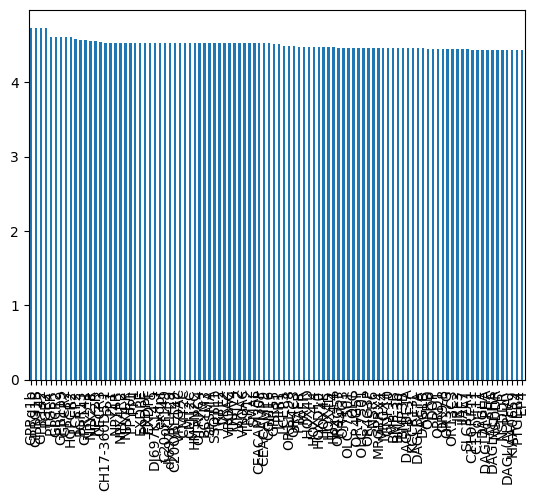

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Prepare the data
X = normalized_embeddings_df.merge(
    sample_attributes_df[["external_id", "ifn status"]],
    left_index=True,
    right_on="external_id",
)

# Filter out NA values and keep only High/Low
mask = X["ifn status"].isin(["High", "Low"])
X_filtered = X[mask]
y = X_filtered["ifn status"]
X_filtered = X_filtered.drop(["external_id", "ifn status"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
print("Random Forest Results:")
print("-" * 50)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Train LightGBM
print("\nLightGBM Results:")
print("-" * 50)
lgb = LGBMClassifier(
    random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1, num_leaves=31
)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))

# Print top 10 important features for both models
print("\nTop 10 Important Features (Random Forest):")
importance_rf = pd.DataFrame(
    {"feature": X_filtered.columns, "importance": rf.feature_importances_}
)
print(importance_rf.nlargest(10, "importance"))

print("\nTop 10 Important Features (LightGBM):")
importance_lgb = pd.DataFrame(
    {"feature": X_filtered.columns, "importance": lgb.feature_importances_}
)
print(importance_lgb.nlargest(10, "importance"))

Random Forest Results:
--------------------------------------------------
              precision    recall  f1-score   support

        High       0.95      0.90      0.93        70
         Low       0.85      0.93      0.89        43

    accuracy                           0.91       113
   macro avg       0.90      0.92      0.91       113
weighted avg       0.92      0.91      0.91       113


LightGBM Results:
--------------------------------------------------
[LightGBM] [Info] Number of positive: 99, number of negative: 164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270536
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 3072
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376426 -> initscore=-0.504747
[LightGBM] [Info] Start training from score -0.504747
[LightGBM] [Warning] No further splits

In [149]:
# from src.recount3_utils import create_rse_manual
# rse = create_rse_manual("SRP150872", "data_sources/sra", "human", "gencode_v26", "gene")
# rse.head()

,gene_id,external_id,counts,rail_id,study,sample_acc,experiment_acc,submission_acc,submission_center,submission_lab,...,run_center,drug dose,drug exposure,ifn status,recruitment site,source_name,subject age,subject sex,timepoint,tissue
0,ENSG00000278704.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
1,ENSG00000277400.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
2,ENSG00000274847.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
3,ENSG00000277428.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
4,ENSG00000276256.1,SRR7368000,0,1572883,SRP150872,SRS3436857,SRX4240949,SRA725005,GEO,NaN,...,NaN,50mg,1,High,1123,Whole blood,34,Female,12,Whole blood
